IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_set = pd.read_csv('Social_Network_Ads.csv')
data_set.drop(['User ID'], axis=1, inplace=True)
data_set.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
# sns.pairplot(data_set)

In [4]:
data_set = pd.get_dummies(data_set, drop_first=True)

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_set, train_size=0.9, random_state=1)
train['source'] = 'train'
test['source'] = 'test'
raw = pd.concat([train, test], axis=0)

In [43]:
train_x = raw[raw['source'] == 'train'].drop(['source', 'Purchased'], axis=1)
train_y = raw[raw['source'] == 'train']['Purchased']

test_x = raw[raw['source'] == 'test'].drop(['source', 'Purchased'], axis=1)
test_y = raw[raw['source'] == 'test']['Purchased']

In [ ]:
train_x.head()

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [51]:
import tensorflow as tf
from tensorflow import keras

inputs = keras.layers.Input(shape=3)
outputs = keras.layers.Dense(1, activation=keras.activations.tanh)(inputs)
model = keras.Model(inputs = inputs, outputs = outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_33 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(train_x, train_y, epochs=100, batch_size=50, validation_split=0.2, shuffle=False)

Epoch 1/100
6/6 [==============================] - 1s 29ms/step - loss: 0.9781 - accuracy: 0.2569 - val_loss: 1.0390 - val_accuracy: 0.2500
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.9735 - accuracy: 0.2708 - val_loss: 1.0340 - val_accuracy: 0.2500
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9688 - accuracy: 0.2778 - val_loss: 1.0290 - val_accuracy: 0.2500
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9642 - accuracy: 0.2812 - val_loss: 1.0240 - val_accuracy: 0.2500
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.9596 - accuracy: 0.2812 - val_loss: 1.0190 - val_accuracy: 0.2500
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9551 - accuracy: 0.2812 - val_loss: 1.0141 - val_accuracy: 0.2500
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.9506 - accuracy: 0.2812 - val_loss: 1.0092 - val_accuracy: 0.2500
Epoch 8/100
6/6 [=========

2/2 [==============================] - 0s 2ms/step


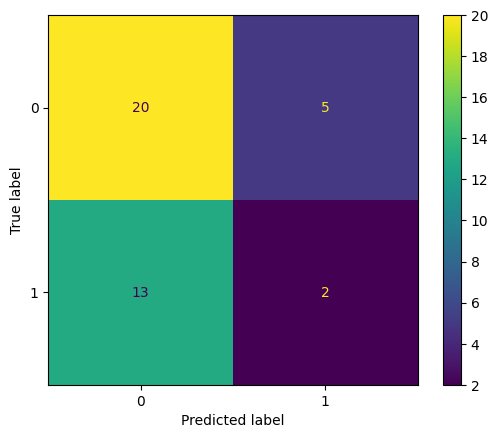

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

preds = model.predict(test_x)
preds = np.where(preds >= 0.5, 1, 0)

ConfusionMatrixDisplay.from_predictions(test_y, preds)